# Немножко интересного про типы данных

In [ ]:
#проверим следующие примеры: TRUE, 1j, "HALP", 2349800, 94,9 , 94.9 , ("one", "two", "tree"), ["one", "two", "tree"]
type()

list

* просто и понятно про [кортежи](https://devpractice.ru/python-lesson-8-tuple/)

* потыкаться в сравнении с ар можно [здесь](http://web.vu.lt/mif/a.buteikis/wp-content/uploads/PE_Book/2-7-r-vs-python.html)
* официальные [туториалы](https://pandas.pydata.org/pandas-docs/version/0.22.0/tutorials.html) (внутри много ссылок на интересные, простые материалы, рассчитано для начинающих)
* кратко почитать об основных типах можно [здесь](https://realpython.com/python-data-types/#boolean-type-boolean-context-and-truthiness)
* более углубленно и развернуто можно почитать о видах данных и работе с ними [здесь](https://docs.python.org/3/library/stdtypes.html#type-objects), а [здесь](https://www.oreilly.com/library/view/learning-python-3rd/9780596513986/ch04.html) многотекста, но очень интересно!





# Поработаем с датсетом

Данные с [Kaggle](https://www.kaggle.com/devready/coffee-and-code): опрос ливанских программистов о том, как они употребляют кофе. 

Для справки: 1,4 чашки кофе в день -- средняя норма (согласно оригинальному описанию данных)

In [ ]:
import pandas as pd
code_coffee = pd.read_csv("https://raw.githubusercontent.com/avmolotova/mpt/main/CoffeeAndCodeLT2018.csv")
code_coffee.head(8)

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
0,8,2,Before coding,Yes,Caffè latte,Sometimes,Female,Lebanon,18 to 29
1,3,2,Before coding,Yes,Americano,Yes,Female,Lebanon,30 to 39
2,5,3,While coding,No,Nescafe,Yes,Female,Lebanon,18 to 29
3,8,2,Before coding,No,Nescafe,Yes,Male,Lebanon,NaN
4,10,3,While coding,Sometimes,Turkish,No,Male,Lebanon,18 to 29
5,8,2,While coding,Sometimes,Nescafe,Yes,Male,Lebanon,30 to 39
6,5,2,While coding,Yes,Nescafe,Sometimes,Male,Lebanon,NaN
7,10,4,Before coding,Sometimes,Turkish,Sometimes,Male,Lebanon,18 to 29


In [ ]:
import numpy as np

gg = lambda x: (x-np.mean(x))/np.std(x)
print(gg(code_coffee.CodingHours))

0     0.604344
1    -1.296110
2    -0.535928
3     0.604344
4     1.364526
        ...   
95   -0.155837
96   -0.916019
97    1.364526
98   -1.676200
99    1.364526
Name: CodingHours, Length: 100, dtype: float64


можно использовать обычный скейл https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html 

In [ ]:
print(f'Сегодня у нас {code_coffee.shape[0]} строчек и {code_coffee.shape[1]} колонок в датасете.')

Сегодня у нас 100 строчек и 9 колонок в датасете.


In [ ]:
code_coffee.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CodingHours          100 non-null    int64 
 1   CoffeeCupsPerDay     100 non-null    int64 
 2   CoffeeTime           100 non-null    object
 3   CodingWithoutCoffee  100 non-null    object
 4   CoffeeType           99 non-null     object
 5   CoffeeSolveBugs      100 non-null    object
 6   Gender               100 non-null    object
 7   Country              100 non-null    object
 8   AgeRange             98 non-null     object
dtypes: int64(2), object(7)
memory usage: 7.2+ KB


Действительно ли обджект играет роль?



In [ ]:
code_coffee["OBJECT"] = code_coffee["CoffeeTime"].str.replace("coding", "")
code_coffee.head()

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange,OBJECT
0,8,2,Before coding,Yes,Caffè latte,Sometimes,Female,Lebanon,18 to 29,Before
1,3,2,Before coding,Yes,Americano,Yes,Female,Lebanon,30 to 39,Before
2,5,3,While coding,No,Nescafe,Yes,Female,Lebanon,18 to 29,While
3,8,2,Before coding,No,Nescafe,Yes,Male,Lebanon,NaN,Before
4,10,3,While coding,Sometimes,Turkish,No,Male,Lebanon,18 to 29,While


In [ ]:
code_coffee["STRING"] = code_coffee["CoffeeTime"].astype('str') 
code_coffee["STRING"] = code_coffee["STRING"].str.replace("coding", "")
code_coffee.head()

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange,OBJECT,STRING
0,8,2,Before coding,Yes,Caffè latte,Sometimes,Female,Lebanon,18 to 29,Before,Before
1,3,2,Before coding,Yes,Americano,Yes,Female,Lebanon,30 to 39,Before,Before
2,5,3,While coding,No,Nescafe,Yes,Female,Lebanon,18 to 29,While,While
3,8,2,Before coding,No,Nescafe,Yes,Male,Lebanon,NaN,Before,Before
4,10,3,While coding,Sometimes,Turkish,No,Male,Lebanon,18 to 29,While,While


In [ ]:
code_coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CodingHours          100 non-null    int64 
 1   CoffeeCupsPerDay     100 non-null    int64 
 2   CoffeeTime           100 non-null    object
 3   CodingWithoutCoffee  100 non-null    object
 4   CoffeeType           99 non-null     object
 5   CoffeeSolveBugs      100 non-null    object
 6   Gender               100 non-null    object
 7   Country              100 non-null    object
 8   AgeRange             98 non-null     object
 9   OBJECT               100 non-null    object
 10  STRING               100 non-null    object
dtypes: int64(2), object(9)
memory usage: 8.7+ KB


У нас есть переменные с 98-99 non null значениями, удалим их, а также новые лишние переменные

In [ ]:
del code_coffee['OBJECT']
code_coffee = code_coffee.drop('STRING', axis = 1) #where 1 is the axis number (0 for rows and 1 for columns)
code_coffee = code_coffee.dropna()

In [ ]:
#функция dtypes
code_coffee["Gender"].dtypes

dtype('O')

In [ ]:
code_coffee.describe()

,CodingHours,CoffeeCupsPerDay
count,97.000000,97.000000
mean,6.371134,2.876289
std,2.650942,1.602457
min,1.000000,1.000000
25%,4.000000,2.000000
50%,7.000000,3.000000
75%,8.000000,4.000000
max,10.000000,8.000000


In [ ]:
import numpy as np
np.mean(code_coffee.CodingHours)

6.371134020618556

In [ ]:
np.median(code_coffee.CodingHours)

7.0

In [ ]:
np.std(code_coffee.CodingHours)

2.6372415596403256

# Агрегация

In [ ]:
code_coffee

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
0,8,2,Before coding,Yes,Caffè latte,Sometimes,Female,Lebanon,18 to 29
1,3,2,Before coding,Yes,Americano,Yes,Female,Lebanon,30 to 39
2,5,3,While coding,No,Nescafe,Yes,Female,Lebanon,18 to 29
4,10,3,While coding,Sometimes,Turkish,No,Male,Lebanon,18 to 29
5,8,2,While coding,Sometimes,Nescafe,Yes,Male,Lebanon,30 to 39
...,...,...,...,...,...,...,...,...,...
95,6,2,Before coding,Yes,Nescafe,Yes,Male,Lebanon,18 to 29
96,4,1,Before coding,Sometimes,Nescafe,Sometimes,Female,Lebanon,18 to 29
97,10,3,Before coding,Yes,Cappuccino,Yes,Male,Lebanon,Under 18
98,2,2,While coding,Sometimes,Espresso (Short Black),Sometimes,Female,Lebanon,18 to 29


In [ ]:
print(f"В среднем програмисты пьют {round(code_coffee.CoffeeCupsPerDay.mean(),2)} чашек кофе в день")
print(f"В среднем мужчины-програмисты пьют {round(code_coffee[code_coffee.Gender == 'Male'].CoffeeCupsPerDay.mean(),1)} чашек кофе в день")
print(f"В среднем женщины-програмисты пьют {round(code_coffee[code_coffee.Gender == 'Female'].CoffeeCupsPerDay.mean(),1)} чашек кофе в день")
print("Cреднее потребление -- 1,4 чашек кофе")

В среднем програмисты пьют 2.88 чашек кофе в день
В среднем мужчины-програмисты пьют 3.1 чашек кофе в день
В среднем женщины-програмисты пьют 2.3 чашек кофе в день
Cреднее потребление -- 1,4 чашек кофе


Есть ли какой-то тип кофе, который положительно влияет на часы кодинга?

In [ ]:
code_coffee.groupby(['CoffeeType']).CodingHours.agg(['mean', 'count'])

,mean,count
CoffeeType,,
American Coffee,7.217391,23
Americano,4.500000,2
Caffè latte,5.200000,5
Cappuccino,5.428571,7
Double Espresso (Doppio),8.000000,3
Espresso (Short Black),5.250000,8
Nescafe,6.100000,30
Turkish,6.842105,19


Какое кофе предпочитаю прогеры разного пола?

In [ ]:
cofgen = code_coffee.groupby(['CoffeeType','Gender']).agg({'CoffeeCupsPerDay': 'mean', 'CodingHours': 'max'}).reset_index()
cofgen
#как можно round 

,CoffeeType,Gender,CoffeeCupsPerDay,CodingHours
0,American Coffee,Female,2.400000,8
1,American Coffee,Male,3.277778,10
2,Americano,Female,2.500000,6
3,Caffè latte,Female,1.500000,8
4,Caffè latte,Male,2.333333,7
5,Cappuccino,Male,3.142857,10
6,Double Espresso (Doppio),Male,5.666667,10
7,Espresso (Short Black),Female,2.000000,2
8,Espresso (Short Black),Male,3.714286,9
9,Nescafe,Female,1.928571,9


# Графички

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

* [Matplotlib colormaps](https://matplotlib.org/tutorials/colors/colormaps.html)
* официальная документация по [сеаборну](https://seaborn.pydata.org/tutorial.html)



### Scatterplots



```
sns.relplot
```
https://seaborn.pydata.org/generated/seaborn.relplot.html


Text(0.5, 1.0, 'Coffee cups per day by Coding hours')

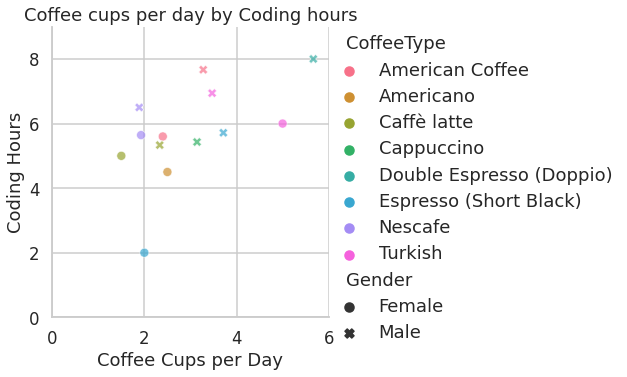

In [ ]:
sns.set(style='whitegrid', context='talk', palette='rainbow')

scatter1 = sns.relplot(x="CoffeeCupsPerDay", y="CodingHours", style="Gender", hue="CoffeeType", alpha=0.7, data=cofgen)
scatter1 = (scatter1.set_axis_labels("Coffee Cups per Day","Coding Hours"))
plt.ylim(0, 9)
plt.xlim(0, 6)
plt.title("Coffee cups per day by Coding hours")

2. Joint distributions



```
sns.jointplot
```

http://seaborn.pydata.org/generated/seaborn.jointplot.html

(1.0, 6.0)

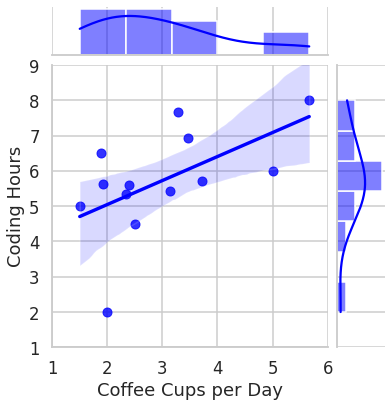

In [ ]:
joint1 = sns.jointplot(x="CoffeeCupsPerDay", y="CodingHours", data=cofgen, kind='reg', color="blue");
joint1 = (joint1.set_axis_labels("Coffee Cups per Day","Coding Hours"))
plt.ylim(1, 9)
plt.xlim(1, 6)

### Barplots



```
sns.countplot/barplot
```

https://seaborn.pydata.org/generated/seaborn.countplot.html

https://seaborn.pydata.org/generated/seaborn.barplot.html


**Возможно ли вообще кодить без кофе?** хороший вопрос....

Text(0.5, 1.0, 'Coding without coffee')

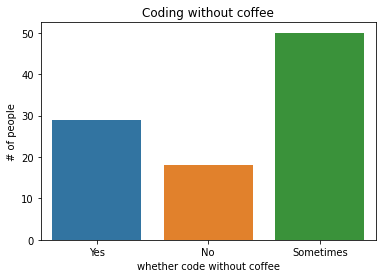

In [ ]:
bar1=sns.countplot(x="CodingWithoutCoffee",data=code_coffee)
bar1.set(xlabel="whether code without coffee", ylabel="# of people")

plt.title("Coding without coffee")


Отличается ли потребление кофе во время написания кода по полу?

Text(0.5, 1.0, 'Title')

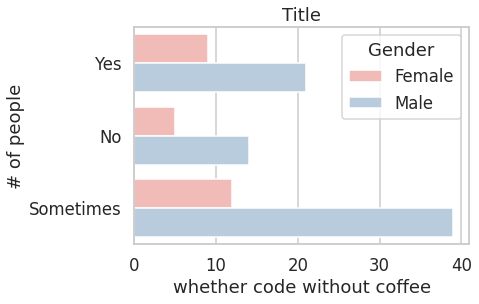

In [ ]:
#sns.countplot(x="CodingWithoutCoffee", hue="Gender", data=code_coffee)
count1=sns.countplot(y="CodingWithoutCoffee", hue="Gender", data=code_coffee,palette="Pastel1")
count1.set(xlabel="whether code without coffee", ylabel="# of people")

plt.title("Title")

Как влияет на количество прокоденых часов?

Text(0.5, 1.0, 'Title')

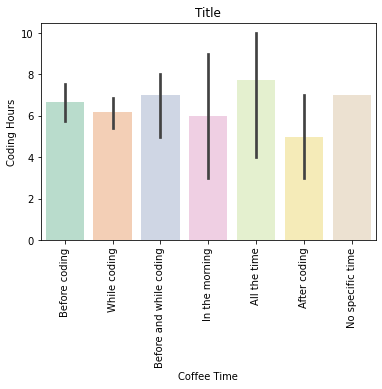

In [ ]:
#meanwhile barplot requires two axis

mbar = sns.barplot(x="CoffeeTime", y="CodingHours", data=code_coffee,palette="Pastel2") #как улучшить? у нас нет coordflip здесь, поэтому ручками меняем местами оси
mbar.set(xlabel="Coffee Time", ylabel="Coding Hours")
plt.xticks(rotation=90)

plt.title("Title")

###Boxplots

Есть ли зависимость количества чашек кофе от того, когда пьется кофе?

Text(0.5, 1.0, 'Title')

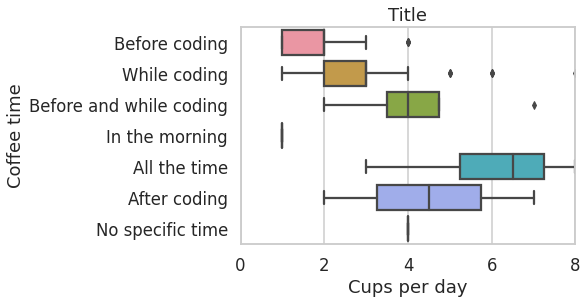

In [ ]:
sns.set_style('whitegrid')

box = sns.boxplot(y="CoffeeTime",x="CoffeeCupsPerDay",data=code_coffee)
box.set(xlabel="Cups per day", ylabel="Coffee time")
plt.xlim(0, 8)
plt.title("Title")

### Histograms



```
sns.displot
```

https://seaborn.pydata.org/tutorial/distributions.html



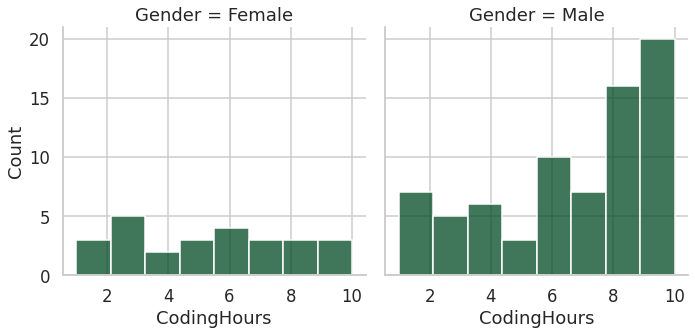

In [ ]:
sns.displot(x="CodingHours", data = code_coffee, col="Gender")

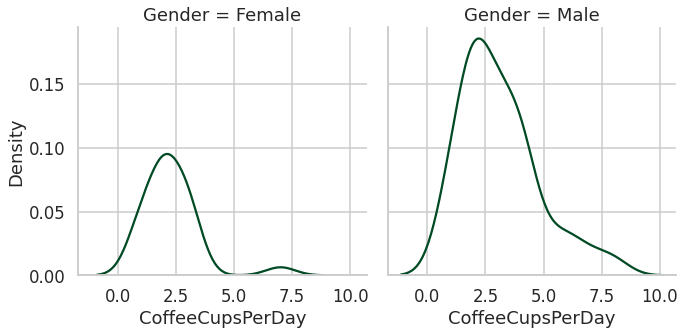

In [ ]:
sns.displot(x="CoffeeCupsPerDay", data = code_coffee, col="Gender", kind="kde")

см также https://seaborn.pydata.org/generated/seaborn.kdeplot.html (отдельный график для распределения)

### Временные (?) ряды



```
# Выбран кодовый формат
```

https://seaborn.pydata.org/generated/seaborn.catplot.html

Влияет ли кофе на баги? Посмотрим, как меняется ответ в разных возрастных группах

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

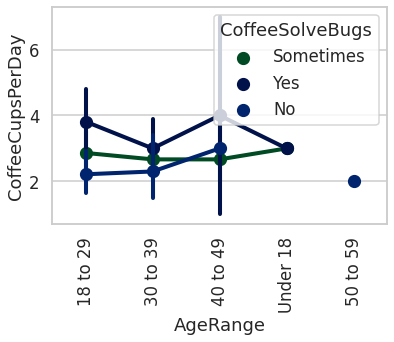

In [ ]:
sns.pointplot(x="AgeRange", y="CoffeeCupsPerDay", data=code_coffee, hue="CoffeeSolveBugs", aspect=4)

plt.xticks(rotation=90)

### Facet Grid

The main approach for visualizing data on this grid is with the **`FacetGrid.map() `**method. Provide it with a plotting function and the name(s) of variable(s) in the dataframe to plot



*   чтобы графики оторажались не по рядам (как сейчас), а по колонкам, вместо аргумента "row" используйте аргумент "col"
*   можете использовать вместе "row" и "col", чтобы получить графики в ячейках = `кол-во категорий в row * кол-во категорий в col`



Text(0.5, 0.98, 'Title')

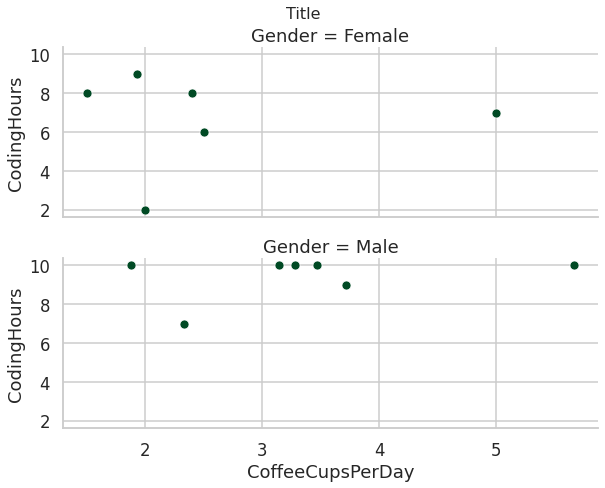

In [ ]:
facet1 = sns.FacetGrid(row = "Gender", data=cofgen, height=3.5, aspect=2.5, margin_titles=False)
facet1.map(sns.scatterplot, "CoffeeCupsPerDay", "CodingHours")
facet1.fig.subplots_adjust(top=0.9)
facet1.fig.suptitle('Title', fontsize=16)


### Нарисовать быстро количественные vars: Multi-plot grids





```
sns.PairGrid
```



Text(0.5, 0.98, 'Title')

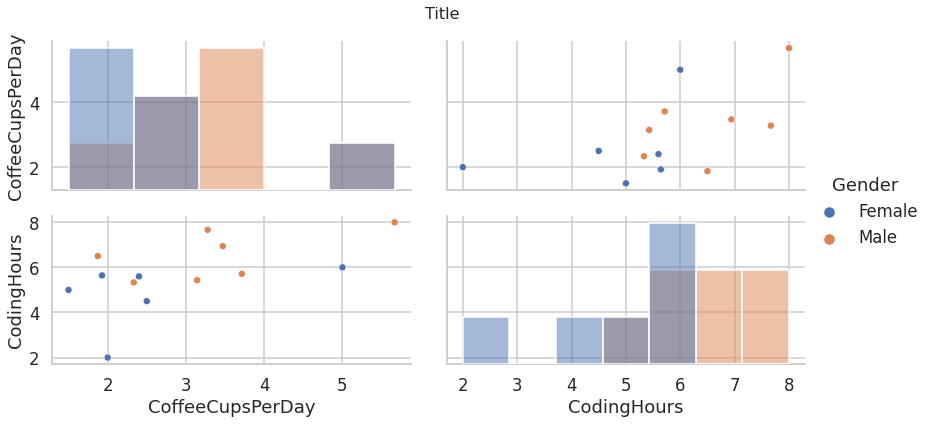

In [ ]:
g=sns.PairGrid(cofgen, hue="Gender", height = 3, aspect = 2)
g.map_diag(sns.histplot) #to show the univariate distribution of the variable in each column
g.map_offdiag(sns.scatterplot, s=50, edgecolor="white")
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Title', fontsize=16)

Или еще быстрее: 

```
sns.pairplot
```



Text(0.5, 0.98, 'Title')

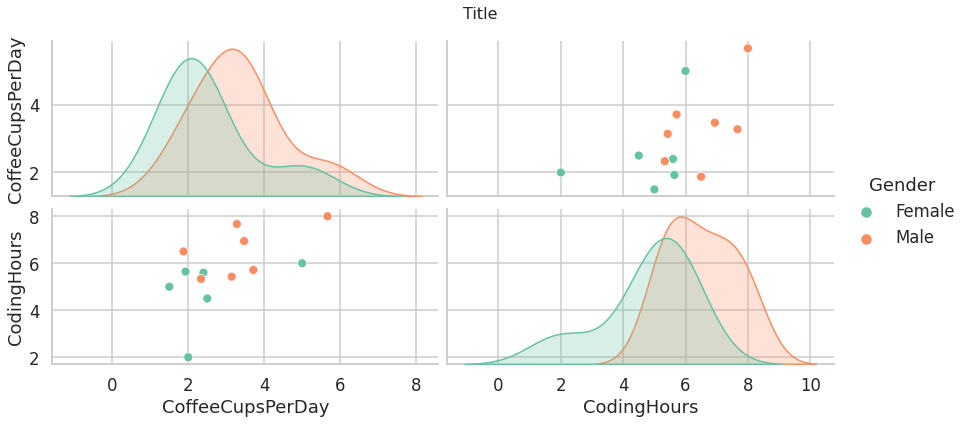

In [ ]:
t = sns.pairplot(cofgen, hue="Gender", palette="Set2", diag_kind="kde", height = 3, aspect = 2)
t.fig.subplots_adjust(top=0.9)
t.fig.suptitle('Title', fontsize=16)

# Домашнаяя работа

Посмотрим, как студенты сдают эказмены! [тык](https://www.kaggle.com/spscientist/students-performance-in-exams)

Внимательно прочитайте описание переменных, загрузите данные и проанализируйте их по плану!

Можно для удобства загрузить со своего или моего гитхаба: https://github.com/avmolotova/mpt/blob/main/StudentsPerformance.csv

In [ ]:
#загружаем данные и пандас

In [ ]:
#описательная статистика: как в среднем студенты пишут свои тесты по разным предметам? (чтение, письмо и математика)


Порисуйте графики зависимости переменных с помощью модуля seaborn

In [ ]:
#график 1: сравните, как ланч влияет на тесты по математике? 
#не забудьте загрузить модуль


In [ ]:
#график 2: посмотрите, есть ли зависимость между оценкой за чтение и письмом? 


In [ ]:
#график 3: влияет как-то образование родителей на успех в математике?


In [ ]:
#добавьте здесь свое, если придумаете что-то интересное; поиграйтесь с фасетками и гридами

**Таск ван**:

Постройте корреляционную матрицу. Укажите переменные, между которыми самая **сильная** связь

In [ ]:
#здесь будет ваша красивая матрица

**Таск ту**:

Как отличаются успехи в математических тестах среди мальчиков и девочек? Является ли разница между ними значимой?


In [ ]:
data = data.rename(columns={"math score": "math_score"}) #прогоните эту строчку перед самим тестом, чтобы питон не потерял колонку

In [ ]:
from scipy import stats

# Create two arrays


# Perform the two-sample t-test


# Test significance


**Таск три**: 

Возьмите гендер и ланч, проведите chi-square тест и сделайте выводы. 

In [ ]:
# Create a table of cross-tabulations


# Perform the Fisher exact test


# Is the result significant?


# Дополнительные материалы и всякое полезное


*   курс статистики в питоне (проходят по основам): https://learn.datacamp.com/courses/exploratory-data-analysis-in-python  (советую!!)
*   основы пандаса https://learn.datacamp.com/courses/data-manipulation-with-pandas 
*   модуль сеаборн https://learn.datacamp.com/courses/introduction-to-data-visualization-with-seaborn 
*   немного в машинку, но мне в целом понравилось https://learn.datacamp.com/courses/case-study-school-budgeting-with-machine-learning-in-python


логрегрессия (из того, что мы делаем на 4 курсе сейчас): 
*   [r] немножно про регрессии, особенно глава 3-4 https://learn.datacamp.com/courses/multiple-and-logistic-regression-in-r 
*   [r] https://rpubs.com/shirokaner/logreg
*   в книге Data Science for Business есть 4 глава, можно тоже почитать о логрегрессии

не смотрела, но тоже выглядит интересно, если кто-то будет смотреть, то пошлите вместе!! вместе веселее и обсудим как раз
*   https://learn.datacamp.com/courses/linear-classifiers-in-python (3 глава)
*   https://learn.datacamp.com/courses/introduction-to-predictive-analytics-in-python (все крутое)
*   https://learn.datacamp.com/courses/generalized-linear-models-in-python (выглядит сложно если честно)

энивей, не советую ограничиваться этим методом, так как по моему опыту в основном в питоне используют XGBoost (он умеет даже NA заполнять самостоятельно!!!!!). немножко [почитать](https://towardsdatascience.com/a-beginners-guide-to-xgboost-87f5d4c30ed7) [здесь](https://towardsdatascience.com/xgboost-theory-and-practice-fb8912930ad6) и [здесь](https://medium.com/analytics-vidhya/what-makes-xgboost-so-extreme-e1544a4433bb) (можно открыть через инкогнито)

